### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.impute import KNNImputer
from sklearn import metrics

### Activity 1

In [2]:
# Loading the dataset
pec2_inicial = pd.read_csv("dataset_pec2.csv")
pec2_inicial.head(10)

,CUSTOMER_ID,SALDO_CUENTA,FRECUENCIA_ACTUALIZACION_SALDO,IMPORTE_COMPRAS,IMPORTE_COMPRAS_ONOFF,IMPORTE_COMPRAS_APLAZO,IMPORTE_EFECTIVO_ADELANTADO,FRECUENCIA_COMPRAS,FRECUENCIA_COMPRAS_APLAZO,FRECUENCIA_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_COMPRAS,LIMITE_CREDITO,IMPORTE_PAGOS,IMPORTE_MINIMO_PAGOS,TOTAL_TARJ_CREDITO,TOTAL_VISITAS_ONLINE,TOTAL_VISITAS_OFICINA
0,C18658,2.850024,0.181818,114.56,0.0,114.56,0.000000,0.250000,0.250000,0.000000,0,3,1000.0,403.212926,130.700011,12,3,0
1,C18844,469.319087,0.818182,383.81,0.0,383.81,870.533909,0.583333,0.500000,0.333333,6,14,1500.0,57.924613,335.598994,12,18,0
2,C12288,1504.334228,0.909091,565.00,565.0,0.00,0.000000,0.250000,0.000000,0.000000,0,3,2200.0,2511.315474,471.295665,12,20,5
3,C12767,2061.835735,1.000000,0.00,0.0,0.00,4320.771337,0.000000,0.000000,0.500000,12,0,4000.0,5451.599084,556.327998,12,19,0
4,C11595,18.218714,0.272727,89.00,0.0,89.00,0.000000,0.083333,0.083333,0.000000,0,1,4000.0,1095.921001,173.068884,12,4,1
5,C13918,175.635786,1.000000,0.00,0.0,0.00,54.180326,0.000000,0.000000,0.083333,2,0,1800.0,324.105254,209.432542,12,8,1
6,C14428,34.017341,0.272727,494.60,494.6,0.00,0.000000,0.083333,0.000000,0.000000,0,1,4000.0,456.293143,19.131945,12,20,2
7,C15958,4735.107991,1.000000,0.00,0.0,0.00,2934.049373,0.000000,0.000000,0.333333,10,0,6000.0,1141.819186,1469.022473,12,25,0
8,C12376,1055.369866,0.545455,0.00,0.0,0.00,3776.644822,0.000000,0.000000,0.166667,2,0,6000.0,2924.470714,195.294122,12,13,2
9,C10032,1162.273324,1.000000,1347.71,400.0,947.71,175.815755,1.000000,1.000000,0.166667,2,45,6000.0,645.998299,256.848991,12,18,5


In [3]:
# 1a 
print("Dimension of data", pec2_inicial.shape)
print("Number of samples:",len(pec2_inicial))
dtypes_var = pec2_inicial.dtypes
print("Number of variables:", len(dtypes_var))
dtypes_var

Dimension of data (7994, 18)
Number of samples: 7994
Number of variables: 18


CUSTOMER_ID                               object
SALDO_CUENTA                             float64
FRECUENCIA_ACTUALIZACION_SALDO           float64
IMPORTE_COMPRAS                          float64
IMPORTE_COMPRAS_ONOFF                    float64
IMPORTE_COMPRAS_APLAZO                   float64
IMPORTE_EFECTIVO_ADELANTADO              float64
FRECUENCIA_COMPRAS                       float64
FRECUENCIA_COMPRAS_APLAZO                float64
FRECUENCIA_EFECTIVO_ADELANTADO           float64
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO      int64
NUM_TRANSACCIONES_COMPRAS                  int64
LIMITE_CREDITO                           float64
IMPORTE_PAGOS                            float64
IMPORTE_MINIMO_PAGOS                     float64
TOTAL_TARJ_CREDITO                         int64
TOTAL_VISITAS_ONLINE                       int64
TOTAL_VISITAS_OFICINA                      int64
dtype: object

In [4]:
#1b
pec2=pec2_inicial.drop(columns=['CUSTOMER_ID'],axis=1)
pec2.columns

Index(['SALDO_CUENTA', 'FRECUENCIA_ACTUALIZACION_SALDO', 'IMPORTE_COMPRAS',
       'IMPORTE_COMPRAS_ONOFF', 'IMPORTE_COMPRAS_APLAZO',
       'IMPORTE_EFECTIVO_ADELANTADO', 'FRECUENCIA_COMPRAS',
       'FRECUENCIA_COMPRAS_APLAZO', 'FRECUENCIA_EFECTIVO_ADELANTADO',
       'NUM_TRANSACCIONES_EFECTIVO_ADELANTADO', 'NUM_TRANSACCIONES_COMPRAS',
       'LIMITE_CREDITO', 'IMPORTE_PAGOS', 'IMPORTE_MINIMO_PAGOS',
       'TOTAL_TARJ_CREDITO', 'TOTAL_VISITAS_ONLINE', 'TOTAL_VISITAS_OFICINA'],
      dtype='object')

In [5]:
#1b
pec2.describe().T

,count,mean,std,min,25%,50%,75%,max
SALDO_CUENTA,7994.0,1546.309503,2056.495837,0.000000,126.134981,864.868214,2014.959018,19043.13856
FRECUENCIA_ACTUALIZACION_SALDO,7994.0,0.877281,0.236988,0.000000,0.888889,1.000000,1.000000,1.00000
IMPORTE_COMPRAS,7994.0,980.533134,1954.559070,0.000000,35.925000,354.565000,1099.545000,32539.78000
IMPORTE_COMPRAS_ONOFF,7994.0,572.496469,1476.628493,0.000000,0.000000,31.695000,564.000000,26547.43000
IMPORTE_COMPRAS_APLAZO,7994.0,408.337100,896.445531,0.000000,0.000000,88.915000,466.722500,22500.00000
IMPORTE_EFECTIVO_ADELANTADO,7994.0,968.399100,2049.667814,0.000000,0.000000,0.000000,1105.841330,29282.10915
FRECUENCIA_COMPRAS,7994.0,0.488379,0.401801,0.000000,0.083333,0.500000,0.916667,1.00000
FRECUENCIA_COMPRAS_APLAZO,7994.0,0.363533,0.396713,0.000000,0.000000,0.166667,0.750000,1.00000
FRECUENCIA_EFECTIVO_ADELANTADO,7994.0,0.134831,0.199833,0.000000,0.000000,0.000000,0.222222,1.50000
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,7994.0,3.222042,6.664906,0.000000,0.000000,0.000000,4.000000,123.00000


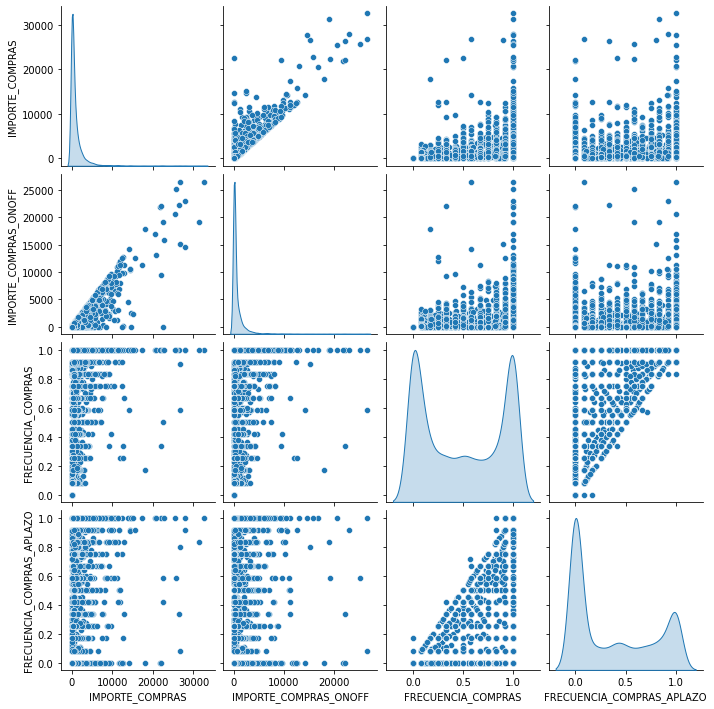

In [6]:
#1c
#i
sns.pairplot(pec2[[ 'IMPORTE_COMPRAS', 'IMPORTE_COMPRAS_ONOFF', 'FRECUENCIA_COMPRAS','FRECUENCIA_COMPRAS_APLAZO']], diag_kind='kde');

<AxesSubplot:>

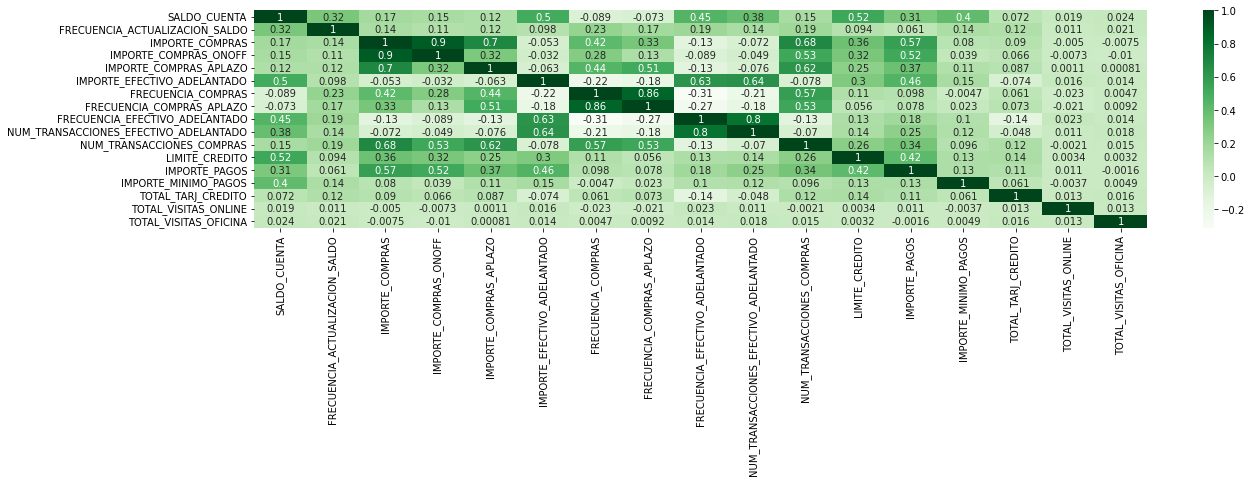

In [7]:
#1c
#ii
corr = pec2.corr()
plt.figure(figsize=(20,4))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="Greens",
            annot=True)

In [8]:
#1d
Q1 = pec2.quantile(0.25)
Q3 = pec2.quantile(0.75)
IQR = Q3 - Q1
((pec2[pec2.columns ]< (Q1 - 1.5 * IQR)) | (pec2[pec2.columns] > (Q3 + 1.5 * IQR))).sum()

SALDO_CUENTA                              640
FRECUENCIA_ACTUALIZACION_SALDO           1332
IMPORTE_COMPRAS                           717
IMPORTE_COMPRAS_ONOFF                     914
IMPORTE_COMPRAS_APLAZO                    775
IMPORTE_EFECTIVO_ADELANTADO               919
FRECUENCIA_COMPRAS                          0
FRECUENCIA_COMPRAS_APLAZO                   0
FRECUENCIA_EFECTIVO_ADELANTADO            468
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO     715
NUM_TRANSACCIONES_COMPRAS                 673
LIMITE_CREDITO                            188
IMPORTE_PAGOS                             716
IMPORTE_MINIMO_PAGOS                      753
TOTAL_TARJ_CREDITO                       1223
TOTAL_VISITAS_ONLINE                        0
TOTAL_VISITAS_OFICINA                       0
dtype: int64

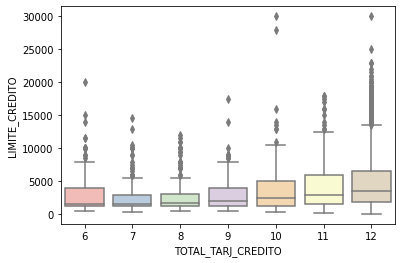

In [9]:
#1d
#i
sns.boxplot(x = 'TOTAL_TARJ_CREDITO', y = 'LIMITE_CREDITO', data = pec2,palette='Pastel1');

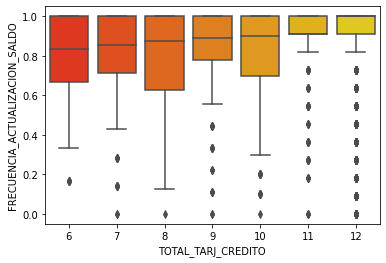

In [10]:
#1d
#ii
sns.boxplot(x = 'TOTAL_TARJ_CREDITO', y = 'FRECUENCIA_ACTUALIZACION_SALDO', data = pec2,palette='autumn');

In [11]:
#1e
#Lets check the missing values and fill them with appropriate method.
pec2.isna().sum()

SALDO_CUENTA                               0
FRECUENCIA_ACTUALIZACION_SALDO             0
IMPORTE_COMPRAS                            0
IMPORTE_COMPRAS_ONOFF                      0
IMPORTE_COMPRAS_APLAZO                     0
IMPORTE_EFECTIVO_ADELANTADO                0
FRECUENCIA_COMPRAS                         0
FRECUENCIA_COMPRAS_APLAZO                  0
FRECUENCIA_EFECTIVO_ADELANTADO             0
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO      0
NUM_TRANSACCIONES_COMPRAS                  0
LIMITE_CREDITO                             1
IMPORTE_PAGOS                              0
IMPORTE_MINIMO_PAGOS                     283
TOTAL_TARJ_CREDITO                         0
TOTAL_VISITAS_ONLINE                       0
TOTAL_VISITAS_OFICINA                      0
dtype: int64

In [12]:
#1e
pec2 = pec2.dropna()

In [13]:
# 1f
datos_scaled = scale(X=pec2, axis=0, with_mean=True, with_std=True) 
datos_scaled = pd.DataFrame(datos_scaled, columns=pec2.columns, index=pec2.index)
datos_scaled.head(10)

,SALDO_CUENTA,FRECUENCIA_ACTUALIZACION_SALDO,IMPORTE_COMPRAS,IMPORTE_COMPRAS_ONOFF,IMPORTE_COMPRAS_APLAZO,IMPORTE_EFECTIVO_ADELANTADO,FRECUENCIA_COMPRAS,FRECUENCIA_COMPRAS_APLAZO,FRECUENCIA_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_COMPRAS,LIMITE_CREDITO,IMPORTE_PAGOS,IMPORTE_MINIMO_PAGOS,TOTAL_TARJ_CREDITO,TOTAL_VISITAS_ONLINE,TOTAL_VISITAS_OFICINA
0,-0.763689,-3.450891,-0.448114,-0.390543,-0.333721,-0.474758,-0.607437,-0.296128,-0.681539,-0.486972,-0.480106,-0.960186,-0.486025,-0.319332,0.355058,-1.033753,-0.916580
1,-0.538603,-0.374352,-0.312220,-0.390543,-0.037612,-0.055016,0.222304,0.333162,0.973085,0.402101,-0.036518,-0.823217,-0.609577,-0.228878,0.355058,1.067290,-0.916580
2,-0.039176,0.065153,-0.220771,-0.013171,-0.459709,-0.474758,-0.607437,-0.925418,-0.681539,-0.486972,-0.480106,-0.631462,0.268301,-0.168974,0.355058,1.347429,1.858208
3,0.229835,0.504657,-0.505934,-0.390543,-0.459709,1.608572,-1.229743,-0.925418,1.800400,1.291173,-0.601085,-0.138376,1.320401,-0.131436,0.355058,1.207359,-0.916580
4,-0.756273,-3.011386,-0.461015,-0.390543,-0.361831,-0.474758,-1.022308,-0.715655,-0.681539,-0.486972,-0.560758,-0.138376,-0.238159,-0.300628,0.355058,-0.893683,-0.361622
5,-0.680314,0.504657,-0.505934,-0.390543,-0.459709,-0.448634,-1.229743,-0.925418,-0.267884,-0.190614,-0.601085,-0.741036,-0.514332,-0.284575,0.355058,-0.333405,-0.361622
6,-0.748650,-3.011386,-0.256303,-0.060192,-0.459709,-0.474758,-1.022308,-0.925418,-0.681539,-0.486972,-0.560758,-0.138376,-0.467032,-0.368585,0.355058,1.347429,0.193335
7,1.519772,0.504657,-0.505934,-0.390543,-0.459709,0.939942,-1.229743,-0.925418,0.973085,0.994816,-0.601085,0.409497,-0.221735,0.271478,0.355058,2.047776,-0.916580
8,-0.255816,-1.692867,-0.505934,-0.390543,-0.459709,1.346213,-1.229743,-0.925418,0.145776,-0.190614,-0.601085,0.409497,0.416137,-0.290817,0.355058,0.366942,0.193335
9,-0.204231,0.504657,0.174274,-0.123377,0.582540,-0.389985,1.259482,1.591742,0.145776,-0.190614,1.213592,0.409497,-0.399151,-0.263643,0.355058,1.067290,1.858208


Text(0, 0.5, 'Cumulative Explained Variance')

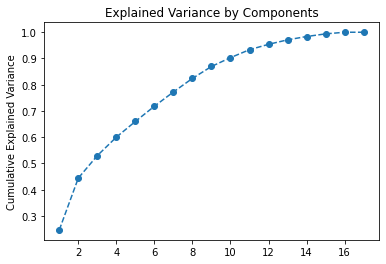

In [14]:
# 1g
pca = PCA()
pca.fit(datos_scaled)
# Plot the explained variances
plt.figure(figsize=(6,4)) 
plt.plot(range(1,18),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--') 
plt.title('Explained Variance by Components')
plt.ylabel('Number of features') 
plt.ylabel('Cumulative Explained Variance') 

To have 80% variance, we need to choose 8 or more componenets

In [15]:
pca = PCA(n_components=8)
datos_pca = pca.fit_transform(datos_scaled)
datos_pca=pd.DataFrame(data = datos_pca, columns=['P1', 'P2','P3','P4','P5','P6','P7','P8'])
datos_pca

,P1,P2,P3,P4,P5,P6,P7,P8
0,-1.724821,-1.661411,1.876036,-0.442027,1.305645,0.201713,-0.010811,-1.999633
1,-0.694107,-0.198877,-0.609283,-0.684110,-0.339230,-1.411734,-0.471138,-0.232184
2,-0.905121,-0.462655,0.727341,0.907747,-2.215380,0.464951,0.410036,0.463272
3,-1.252837,2.984984,0.260148,-0.462850,-0.514682,-1.463480,-0.880775,0.063918
4,-1.723897,-1.162319,2.154146,0.013205,0.859974,0.520621,0.015828,-1.818970
...,...,...,...,...,...,...,...,...
7705,-0.217978,-1.738411,-0.399373,-0.760629,1.622294,0.305419,-0.225760,-0.252774
7706,-0.967714,-0.487210,0.335088,0.598426,-0.544339,-1.692900,-0.224732,0.826222
7707,-2.049519,0.567354,0.291851,-1.523819,-1.816754,1.298310,2.199583,1.073475
7708,-1.143131,1.570913,1.986130,-0.349606,-0.210331,-1.126281,-0.438019,-1.753617


## Activity 2

## 1.Métodos de asignacion

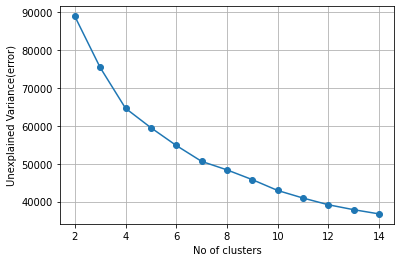

In [21]:
#a Number cluster
#Elbow method
cluster_range= range(2, 15)
errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=123,init='k-means++',max_iter=300,n_init=10)
    clusters.fit(datos_pca)
    errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({'Cluster_no' : range(2, 15), 'Unexpalined_variance' : errors})
plt.plot(clusters_df.Cluster_no, clusters_df.Unexpalined_variance, marker = 'o')
plt.xlabel('No of clusters')
plt.ylabel('Unexplained Variance(error)')
plt.grid('True')

Here after cluster 4 the incremental decrease in error is almost constant

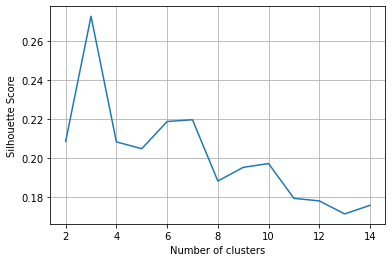

In [22]:
#a Number cluster
#silhouette method
k_range = range(2, 15)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123,init='k-means++',max_iter=300,n_init=10)
    km.fit(datos_pca)
    scores.append(metrics.silhouette_score(datos_pca, labels=km.labels_,metric='euclidean'))
plt.plot( k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid('True')

Here 3 cluster seems optimal solution as the sc score, is highest around

In [23]:
#a Number cluster
# Davies Bouldin method 
for i in [2,3,4,5]:
    kmeans_labels=KMeans(n_clusters=i,random_state=123,init='k-means++',max_iter=300,n_init=10).fit_predict(datos_pca)
    print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(datos_pca,kmeans_labels).round(3)))

Davies Bouldin Score:1.819
Davies Bouldin Score:1.437
Davies Bouldin Score:1.448
Davies Bouldin Score:1.446


We want to be low of Davies score. Hence, when we evaluate both Elbow technique and Silhouette score, optimal cluster numbers are 3-4 according to K-Means Algorithm. So I have determined 3 as the k values of the K-means model.

### KMEANS

In [24]:
#b Algorithm 
kmeans_labels=KMeans(n_clusters=3,random_state=123,init='k-means++',max_iter=300,n_init=10).fit_predict(datos_pca)

<AxesSubplot:xlabel='P1', ylabel='P2'>

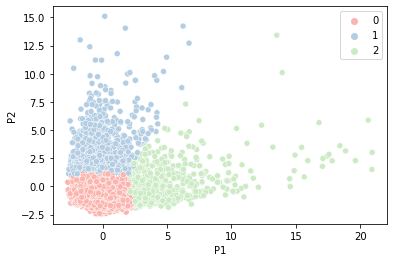

In [25]:
#b Let's visualize the dataset in two-dimensional space. Hence, we should apply PCA before.
sns.scatterplot(x=datos_pca['P1'], y=datos_pca['P2'], c=kmeans_labels,palette='Pastel1',hue=kmeans_labels)

## 2.Métodos jerárquicos

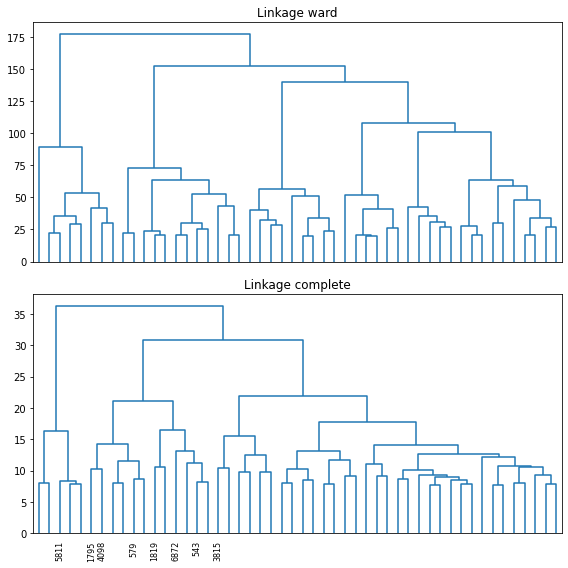

In [49]:
# a visualization of the model
# Dendrogramas
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
dend = shc.dendrogram(shc.linkage(datos_pca, method='ward'), truncate_mode='lastp', p=50,  show_leaf_counts=False, ax=axs[0],color_threshold=0)
axs[0].set_title("Linkage ward")
dend = shc.dendrogram(shc.linkage(datos_pca, method='complete'), truncate_mode='lastp', p=50,  show_leaf_counts=False, ax=axs[1],color_threshold=0)
axs[1].set_title("Linkage complete")
plt.tight_layout();


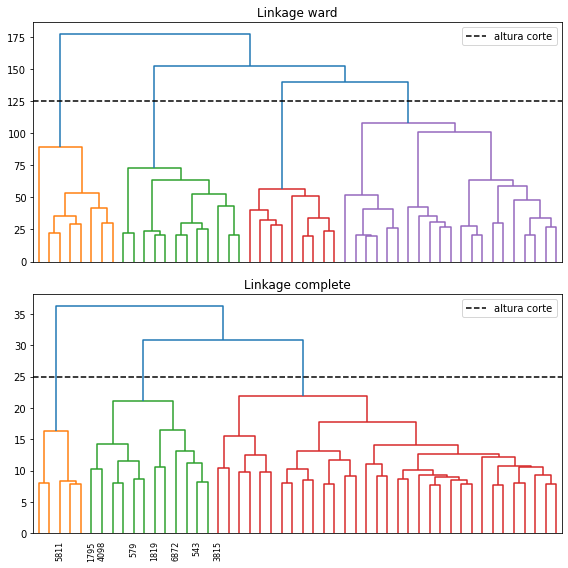

In [45]:
# a visualization of the model
# Dendrogramas
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
dend = shc.dendrogram(shc.linkage(datos_pca, method='ward'), truncate_mode='lastp', p=50,  show_leaf_counts=False, ax=axs[0])
axs[0].set_title("Linkage ward")
axs[0].axhline(y=125, c = 'black', linestyle='--', label='altura corte')
axs[0].legend();
dend = shc.dendrogram(shc.linkage(datos_pca, method='complete'), truncate_mode='lastp', p=50,  show_leaf_counts=False, ax=axs[1])
axs[1].set_title("Linkage complete")
axs[1].axhline(y=25, c = 'black', linestyle='--', label='altura corte')
axs[1].legend();
plt.tight_layout();

In [96]:
# b Algorithm 
hcluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
hcp=hcluster.fit_predict(datos_pca)
print('Silhouette Score for Hieararchial Clustering:'+str(metrics.silhouette_score(datos_pca,hcp,metric='euclidean')))
print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(datos_pca,hcp)))

Silhouette Score for Hieararchial Clustering:0.1487723114099651
Davies Bouldin Score:1.5974826242210978


<AxesSubplot:xlabel='P1', ylabel='P2'>

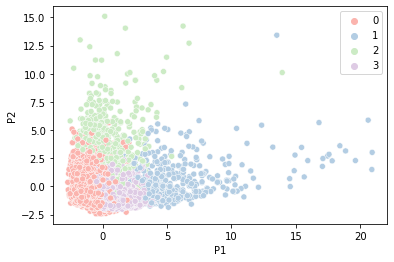

In [97]:
#b Let's visualize the dataset in two-dimensional space. Hence, we should apply PCA before.
sns.scatterplot(x=datos_pca['P1'], y=datos_pca['P2'], c=hcp,palette='Pastel1',hue=hcp)

## 4. ELECCION MÉTODO CLUSTERING E INTERPRETACION

In [98]:
# a Comparation algorithms
algorithms=["K-Means","Hierarchical Clustering"]

# Silhouette Score
ss=[metrics.silhouette_score(datos_scaled,kmeans_labels),
    metrics.silhouette_score(datos_scaled,hcp)]

# Davies Bouldin Score
db=[metrics.davies_bouldin_score(datos_scaled,kmeans_labels),
    metrics.davies_bouldin_score(datos_scaled,hcp)]


In [99]:
#a Select algorithm
comprsn={"Algorithms":algorithms,"Davies Bouldin":db,"Silhouette Score":ss}
compdf=pd.DataFrame(comprsn)
display(compdf.sort_values(by=["Silhouette Score"], ascending=False))

,Algorithms,Davies Bouldin,Silhouette Score
0,K-Means,1.657736,0.255579
1,Hierarchical Clustering,1.823498,0.121509


In [100]:
# b Interpretation with the dataset before scale
pec2['Clusters']=list(kmeans_labels)
customers=pd.DataFrame(pec2['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})
customers.T

,0,1,2
Number of Customers,5604,1383,723


In [101]:
# b Interpretation
means=pd.DataFrame(pec2.describe().loc['mean'])
means.T.iloc[:,[0,1,6,8,9,11,12,16]].round(1)

,SALDO_CUENTA,FRECUENCIA_ACTUALIZACION_SALDO,FRECUENCIA_COMPRAS,FRECUENCIA_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,LIMITE_CREDITO,IMPORTE_PAGOS,TOTAL_VISITAS_OFICINA
mean,1585.5,0.9,0.5,0.1,3.3,4505.1,1761.5,1.7


In [102]:
# b Interpretation
pec2.set_index('Clusters')
grouped=pec2.groupby(by='Clusters').mean().round(1)
grouped

,SALDO_CUENTA,FRECUENCIA_ACTUALIZACION_SALDO,IMPORTE_COMPRAS,IMPORTE_COMPRAS_ONOFF,IMPORTE_COMPRAS_APLAZO,IMPORTE_EFECTIVO_ADELANTADO,FRECUENCIA_COMPRAS,FRECUENCIA_COMPRAS_APLAZO,FRECUENCIA_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_COMPRAS,LIMITE_CREDITO,IMPORTE_PAGOS,IMPORTE_MINIMO_PAGOS,TOTAL_TARJ_CREDITO,TOTAL_VISITAS_ONLINE,TOTAL_VISITAS_OFICINA
Clusters,,,,,,,,,,,,,,,,,
0,851.7,0.9,606.0,322.3,284.0,321.4,0.5,0.4,0.1,1.2,10.4,3464.8,991.4,526.5,11.5,10.3,1.7
1,3959.5,1.0,390.3,254.5,135.9,3891.5,0.2,0.1,0.5,12.6,5.9,6680.4,3127.2,1767.8,11.4,10.8,1.7
2,2732.1,1.0,5246.0,3250.6,1996.3,564.5,0.9,0.8,0.1,1.7,67.1,8407.6,5118.4,1645.5,11.9,10.1,1.6


In [108]:
grouped.T

Clusters,0,1,2
SALDO_CUENTA,851.7,3959.5,2732.1
FRECUENCIA_ACTUALIZACION_SALDO,0.9,1.0,1.0
IMPORTE_COMPRAS,606.0,390.3,5246.0
IMPORTE_COMPRAS_ONOFF,322.3,254.5,3250.6
IMPORTE_COMPRAS_APLAZO,284.0,135.9,1996.3
IMPORTE_EFECTIVO_ADELANTADO,321.4,3891.5,564.5
FRECUENCIA_COMPRAS,0.5,0.2,0.9
FRECUENCIA_COMPRAS_APLAZO,0.4,0.1,0.8
FRECUENCIA_EFECTIVO_ADELANTADO,0.1,0.5,0.1
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,1.2,12.6,1.7


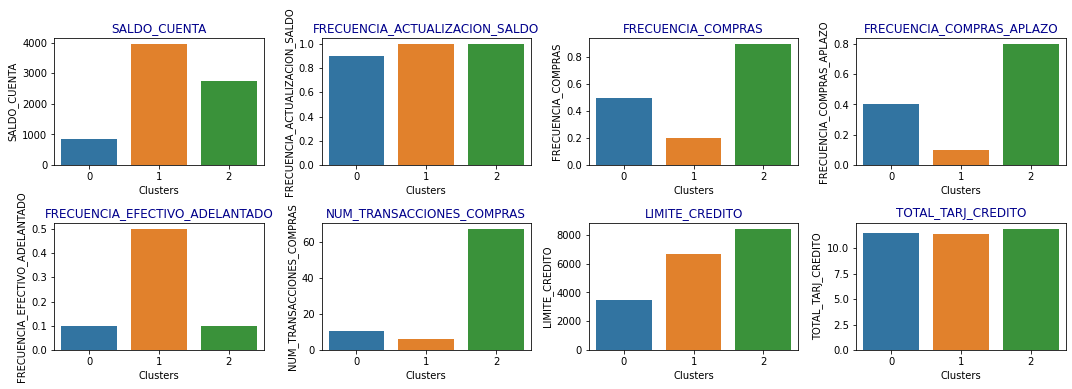

In [107]:
# b Interpretation
features=["SALDO_CUENTA","FRECUENCIA_ACTUALIZACION_SALDO","FRECUENCIA_COMPRAS","FRECUENCIA_COMPRAS_APLAZO","FRECUENCIA_EFECTIVO_ADELANTADO","NUM_TRANSACCIONES_COMPRAS","LIMITE_CREDITO","TOTAL_TARJ_CREDITO"]
plt.figure(figsize=(15,10))
for i,j in enumerate(features):
    plt.subplot(4,4,i+1)
    sns.barplot(grouped.index,grouped[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()